In [ ]:
import numpy as np
import pandas as pd
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import tensorflow as tf


In [ ]:
!pip install py-openaq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for py-openaq: filename=py_openaq-1.1.0-py3-none-any.whl size=9037 sha256=fc72971749cb986e473a2ec7faa405429752c9aef430f5792fadb63b44fbdfd2
  Stored in directory: /root/.cache/pip/wheels/b7/64/46/caec8d415716f8ebeb1e95f11d8c83aff852f41ab6eb1dc98f
Successfully built py-openaq


In [ ]:
!pip install meteostat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import openaq
# Import Meteostat library and dependencies
from meteostat import Point, Hourly, Daily

openaq = openaq.OpenAQ(version="v2")

class Location:
    def __init__(self, name, lat, lon):
        self.name = name
        self.lat = lat
        self.lon = lon


locations_IT = []

cities = openaq.cities(country="In", limit=100000, df=True)["city"]

for city in cities:
    print(city) 
    try:
        res = openaq.locations(city=city, df=True)[["coordinates.latitude","coordinates.longitude"]].mean()
    
        locations_IT.append(Location(city, res["coordinates.latitude"], res["coordinates.longitude"]))
    except:
        print("-----------Skipped {}-----------".format(city))

Agartala
Agra
Ahmedabad
Aizawl
Ajmer
Alwar
Amaravati
Ambala
Amritsar
Ankleshwar
Araria
Arrah
Asansol
Aurangabad
Baddi
Bagalkot
Baghpat
Bahadurgarh
Ballabgarh
Barddhaman
-----------Skipped Barddhaman-----------
Bathinda
Begusarai
Bengaluru
Bettiah
Bhagalpur
Bhilai
Bhiwadi
Bhiwani
Bhopal
Bidar
Bihar Sharif
Bilaspur
Brajrajnagar
Bulandshahr
Buxar
Chamarajanagar
Chandigarh
Chandrapur
Charkhi Dadri
Chennai
Chhapra
Chikkaballapur
Chikkamagaluru
Coimbatore
Damoh
Darbhanga
Davanagere
Dehradun
Delhi
Dewas
Dharuhera
Durgapur
Eloor
Ernakulam
Faridabad
Fatehabad
Firozabad
Gadag
Gandhinagar
Gangtok
Gaya
Ghaziabad
Gorakhpur
Greater Noida
Gummidipoondi
Gurugram
Guwahati
Gwalior
Hajipur
Haldia
Hapur
Hassan
Haveri
Hisar
Howrah
Hubballi
Hyderabad
Imphal
India
Indore
Jabalpur
Jaipur
Jalandhar
Jhansi
Jind
Jodhpur
Jorapokhar
Kaithal
Kalaburagi
Kalaburgi
-----------Skipped Kalaburgi-----------
Kalyan
Kannur
Kanpur
Karnal
Katihar
Katni
Khanna
Kishanganj
Kochi
Kohima
Kolar
Kolkata
Kollam
Koppal
Kota
Kozhikode

In [ ]:
from datetime import datetime, timedelta
import time
import pandas as pd

# Delhi index 47
selected_location = locations_IT[47]
print(selected_location.name)
# Format coordinates to align with OpenAQ standards
coordinates = "{},{}".format(round(selected_location.lat, 8), round(selected_location.lon, 8))

now = datetime(2021,10,1)

# For some reason the OpenAQ API accepts the date only in this way
date_from = datetime(2020 , 5, 10)
date_to = datetime(now.year, now.month, now.day) + timedelta(days=1)

print("Time Range: {} - {}".format(date_from, date_to))

selected_pollutants = ['pm25','pm10','no2','o3','so2','co']

# Create empty Dataframe
df_pollutants = pd.DataFrame(columns=selected_pollutants)

# getPollutants()

for pollutant in selected_pollutants:
    locations = openaq.locations(coordinates=coordinates, parameter=pollutant, radius=20000, df=True, has_geo=True)

    dfs_array = []
    for location in locations["id"]:
        try:
            time.sleep(3)
            df = openaq.measurements(location=location,
                                     date_from=date_from.date(), 
                                     date_to=date_to.date(),
                                     limit=100000, 
                                     parameter=pollutant,
                                     df=True,
                                     sort="asc")[["value"]].resample('H').mean()
            
            dfs_array.append(df)
            print("Added location {}".format(location))
        
        except:
            print("Skipped location {}".format(location))
    
    dfs_array = sorted(dfs_array,key=lambda x:x.index[0])
    df_pollutants[pollutant] = pd.concat(dfs_array, join="outer", axis = 1, sort=False).mean(axis=1)
    print("Added pollutant {}".format(pollutant))
    print("---------------------")

print("Data fetching completed!")

df_pollutants

Delhi
Time Range: 2020-05-10 00:00:00 - 2021-10-02 00:00:00


Added location 5630
Added location 7005
Skipped location 345277
Skipped location 345271
Skipped location 345259
Added location 231525
Added location 5627
Skipped location 314878
Added location 10486
Skipped location 314946
Skipped location 314952
Skipped location 314959
Skipped location 315076
Skipped location 314927
Skipped location 315063
Skipped location 5541
Added location 5665
Added location 5616
Skipped location 299898
Skipped location 314842
Skipped location 314920
Skipped location 314917
Added location 6934
Added location 6359
Added location 8915
Skipped location 345264
Skipped location 345260
Skipped location 345261
Skipped location 345257
Skipped location 345262
Skipped location 345224
Skipped location 345216
Skipped location 314894
Added location 5650
Skipped location 315035
Added location 231494
Added location 231406
Added location 231401
Skipped location 325556
Added location 10489
Added location 11603
Added location 8118
Added location 6358
Added location 6929
Added locat

,pm25,pm10,no2,o3,so2,co
date.local,,,,,,
2020-05-10 05:00:00,58.034211,110.055556,13.585500,52.262105,11.142778,771.052632
2020-05-10 06:00:00,58.122581,119.764643,13.946207,46.129310,12.405385,776.624138
2020-05-10 07:00:00,58.029293,117.268556,13.009877,50.262167,11.643125,744.784524
2020-05-10 08:00:00,57.566275,120.596774,13.470699,56.497151,12.205357,787.172396
2020-05-10 09:00:00,52.736923,117.967778,10.979615,43.265000,9.713333,882.083333
...,...,...,...,...,...,...
2021-10-02 01:00:00,56.000000,NaN,NaN,NaN,NaN,NaN
2021-10-02 02:00:00,56.000000,NaN,NaN,NaN,NaN,NaN
2021-10-02 03:00:00,63.000000,NaN,NaN,NaN,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0fdc2ebd0>,
      dtype=object)

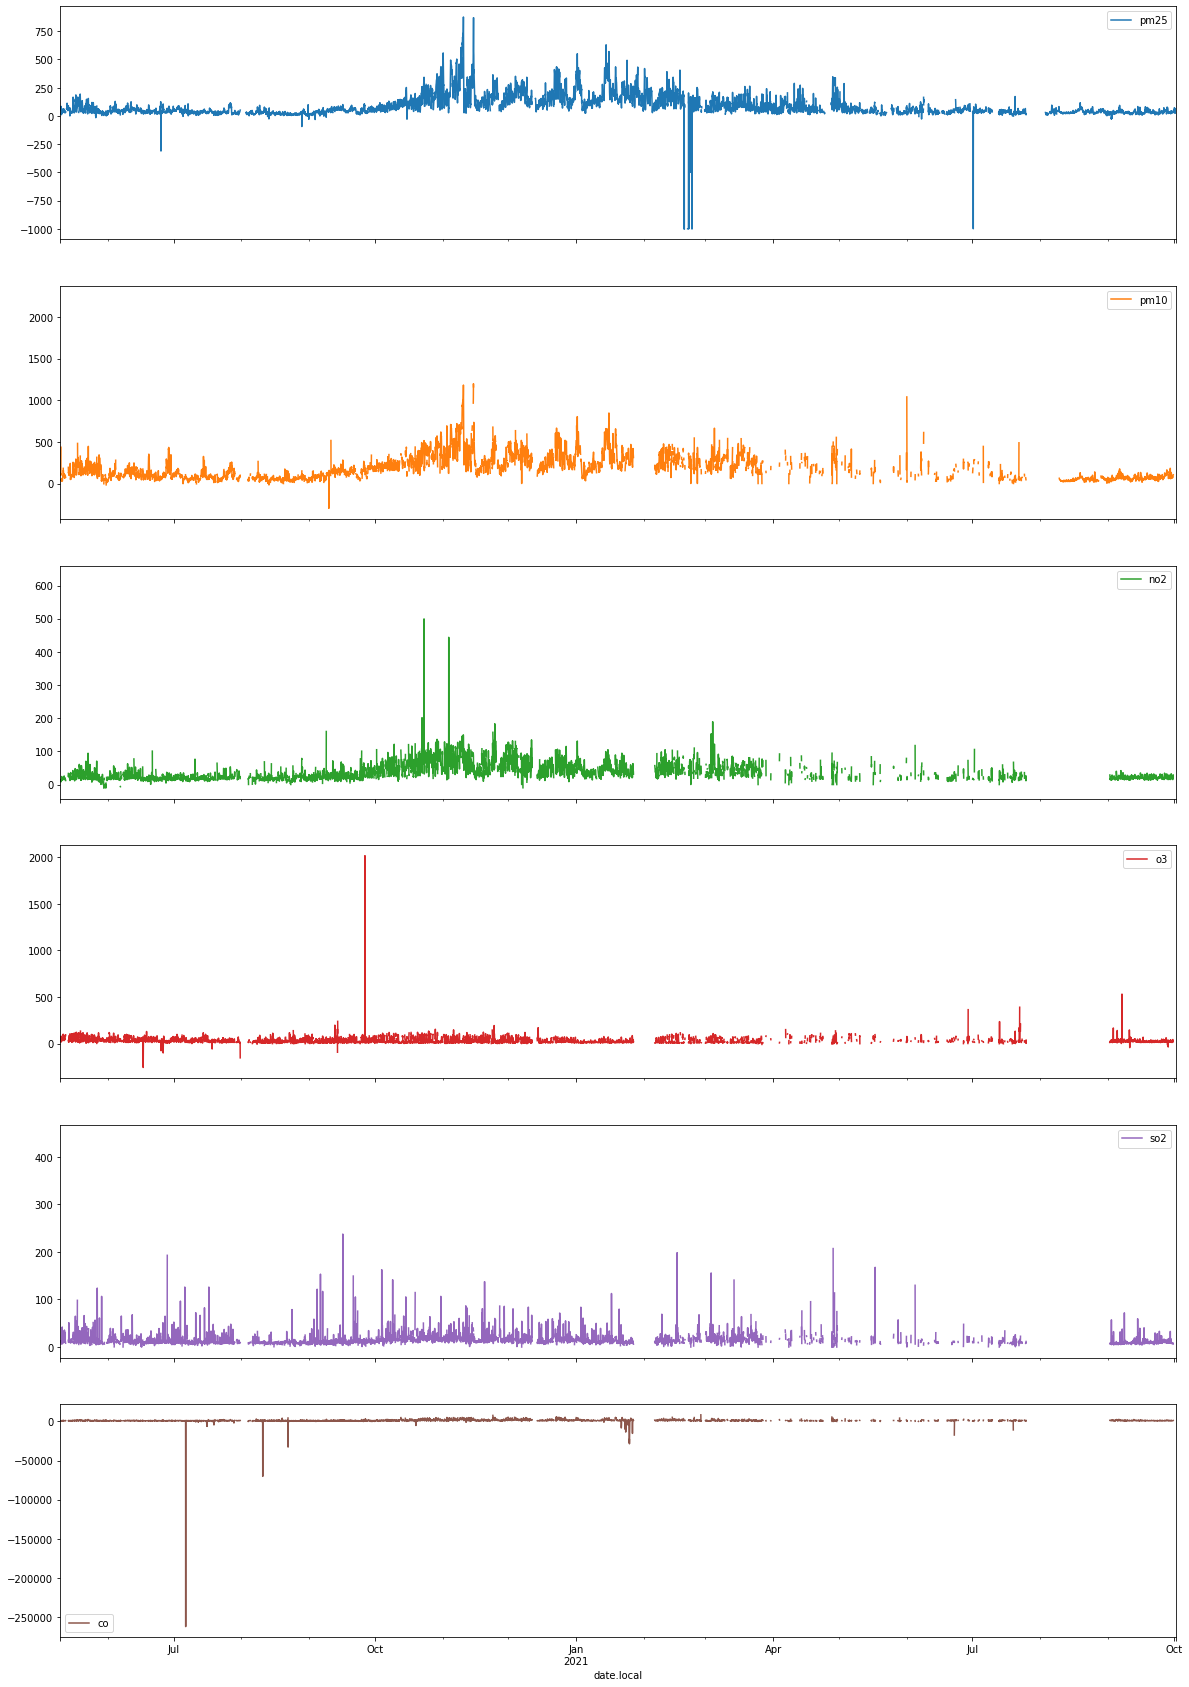

In [ ]:
df_pollutants.plot(figsize=(20,30), subplots=True)

In [ ]:
# Create Point for delhi
# We will give the median between the maximum: 17m, minimum: 0m elevation of delhi

loc = Point(selected_location.lat, selected_location.lon, 9.5)

# temp  The air temperature in °C
# dwpt  The dew point in °C
# rhum  The relative humidity in percent (%)
# prcp  The one hour precipitation total in mm
# snow  The snow depth in mm
# wdir  The average wind direction in degrees (°)
# wspd  The average wind speed in km/h
# wpgt  The peak wind gust in km/h
# pres  The average sea-level air pressure in hPa
# tsun  The one hour sunshine total in minutes (m)
# coco  The weather condition code

# Get hourly data
df_weather = Hourly(loc=loc, start=date_from, end=date_to)
df_weather = df_weather.normalize()
df_weather = df_weather.fetch()

# Remove columns that hold no values
weather_features = ['dwpt', 'prcp', 'snow', 'wdir', 'wpgt', 'tsun']
df_weather.drop(weather_features, axis=1, inplace=True)
# df_weather = df_weather.interpolate(method='time')

final_df = df_pollutants.merge(df_weather, left_index=True, right_index=True)

final_df

,pm25,pm10,no2,o3,so2,co,temp,rhum,wspd,pres,coco
2020-05-10 05:00:00,58.034211,110.055556,13.585500,52.262105,11.142778,771.052632,34.4,53.0,14.8,1006.3,2.0
2020-05-10 06:00:00,58.122581,119.764643,13.946207,46.129310,12.405385,776.624138,36.5,47.0,11.2,1006.5,2.0
2020-05-10 07:00:00,58.029293,117.268556,13.009877,50.262167,11.643125,744.784524,36.4,46.0,13.0,1006.1,2.0
2020-05-10 08:00:00,57.566275,120.596774,13.470699,56.497151,12.205357,787.172396,37.2,43.0,11.1,1005.6,2.0
2020-05-10 09:00:00,52.736923,117.967778,10.979615,43.265000,9.713333,882.083333,27.3,66.0,13.0,1008.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01 20:00:00,58.000000,NaN,NaN,NaN,NaN,NaN,29.1,91.0,0.0,1007.7,2.0
2021-10-01 21:00:00,58.000000,NaN,NaN,NaN,NaN,NaN,29.1,94.0,0.0,1008.6,2.0
2021-10-01 22:00:00,50.000000,NaN,NaN,NaN,NaN,NaN,29.0,91.0,1.8,1007.6,2.0
2021-10-01 23:00:00,49.000000,NaN,NaN,NaN,NaN,NaN,28.7,91.0,1.8,1007.4,2.0


fill any empty values

In [ ]:
cols_with_Nan = final_df.columns[final_df.isnull().any()].tolist()

if cols_with_Nan:
    for col in cols_with_Nan:
        print(col)
        while(final_df[col].isnull().sum() > 0):
            final_df[col] = final_df[col].fillna(final_df[col].rolling('4D',min_periods=1).mean())
        final_df[col] = final_df[col].interpolate(method='time', limit_direction='both')
        
final_df.isnull().sum()

pm25
pm10
no2
o3
so2
co


pm25    0
pm10    0
no2     0
o3      0
so2     0
co      0
temp    0
rhum    0
wspd    0
pres    0
coco    0
dtype: int64

# Calculate AQI for each pollutant

EEA AQI TABLE

| Key | Category | PM2,5 μg/m³ | PM10 μg/m³ | NO2 ppb | O3 ppb | SO2 ppb
| :- | :- | :- | :- | :- | :- | :- |
| 1 | Good | 0-10 | 0-20 | 0-40 | 0-50 | 0-100 | 
| 2 | Fair | 10-20 | 20-40 | 40-90 | 50-100 | 100-200 | 
| 3 | Moderate | 20-25 | 40-50 | 90-120 | 100-130 | 200-350 | 
| 4 | Poor | 25-50 | 50-100 | 120-230 | 130-240 | 350-500 |
| 5 | Very Poor | 50-75 | 100-150 | 230-340 | 240-380 | 500-750 |
| 6 | Extremely Poor | 75-800 | 150-1200 | 340-1000 | 380-800 | 750-1250 |

We will use key numbers for each category:

Good: 1
Fair: 2
Moderate: 3
Poor: 4
Very Poor: 5
Extremely Poor: 6

### Define functions to calculate AQI for each pollutant

In [ ]:
def calcPM25(x):
    if x <= 10:
        return 1
    elif x >=11 and x <= 20:
        return 2
    elif x >=21 and x <= 25:
        return 3
    elif x >=26 and x <= 50:
        return 4
    elif x >=51 and x <= 75:
        return 5
    elif x >=76:
        return 6
    else:
        return 1
    
def calcPM10(x):
    if x <= 20:
        return 1
    elif x >=21 and x <= 40:
        return 2
    elif x >=41 and x <= 50:
        return 3
    elif x >=51 and x <= 100:
        return 4
    elif x >=101 and x <= 150:
        return 5
    elif x >=151:
        return 6
    else:
        return 1
    
def calcNO2(x):
    if x <= 40:
        return 1
    elif x >=41 and x <= 90:
        return 2
    elif x >=91 and x <= 120:
        return 3
    elif x >=121 and x <= 230:
        return 4
    elif x >=231 and x <= 340:
        return 5
    elif x >=341:
        return 6
    else:
        return 1
    
def calcO3(x):
    if x <= 50:
        return 1
    elif x >=51 and x <= 100:
        return 2
    elif x >=101 and x <= 130:
        return 3
    elif x >=131 and x <= 240:
        return 4
    elif x >=241 and x <= 380:
        return 5
    elif x >=381:
        return 6
    else:
        return 1
    
def calcSO2(x):
    if x <= 100:
        return 1
    elif x >=101 and x <= 200:
        return 2
    elif x >=201 and x <= 350:
        return 3
    elif x >=351 and x <= 500:
        return 4
    elif x >=501 and x <= 750:
        return 5
    elif x >=751:
        return 6
    else:
        return 1

    
final_df["pm25_AQI"] = final_df["pm25"].apply(lambda x: calcPM25(x))
final_df["pm10_AQI"] = final_df["pm10"].apply(lambda x: calcPM10(x))
final_df["no2_AQI"] = final_df["no2"].apply(lambda x: calcNO2(x))
final_df["o3_AQI"] = final_df["o3"].apply(lambda x: calcO3(x))
final_df["so2_AQI"] = final_df["so2"].apply(lambda x: calcSO2(x))

In [ ]:
# final_df["overall_AQI"] = max(final_df[["pm25_AQI", "pm10_AQI", "o3_AQI", "so2_AQI", "co_AQI"]])
final_df["overall_AQI"] = final_df[["pm25_AQI","pm10_AQI","no2_AQI","o3_AQI","so2_AQI"]].max(axis=1)

final_df

,pm25,pm10,no2,o3,so2,co,temp,rhum,wspd,pres,coco,pm25_AQI,pm10_AQI,no2_AQI,o3_AQI,so2_AQI,overall_AQI
2020-05-10 05:00:00,58.034211,110.055556,13.585500,52.262105,11.142778,771.052632,34.4,53.0,14.8,1006.3,2.0,5,5,1,2,1,5
2020-05-10 06:00:00,58.122581,119.764643,13.946207,46.129310,12.405385,776.624138,36.5,47.0,11.2,1006.5,2.0,5,5,1,1,1,5
2020-05-10 07:00:00,58.029293,117.268556,13.009877,50.262167,11.643125,744.784524,36.4,46.0,13.0,1006.1,2.0,5,5,1,1,1,5
2020-05-10 08:00:00,57.566275,120.596774,13.470699,56.497151,12.205357,787.172396,37.2,43.0,11.1,1005.6,2.0,5,5,1,2,1,5
2020-05-10 09:00:00,52.736923,117.967778,10.979615,43.265000,9.713333,882.083333,27.3,66.0,13.0,1008.3,2.0,5,5,1,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01 20:00:00,58.000000,97.247257,21.684876,19.913027,10.997194,1016.422158,29.1,91.0,0.0,1007.7,2.0,5,4,1,1,1,5
2021-10-01 21:00:00,58.000000,96.377594,21.543178,19.888464,11.030029,1009.786225,29.1,94.0,0.0,1008.6,2.0,5,4,1,1,1,5
2021-10-01 22:00:00,50.000000,95.480870,21.432849,19.918104,11.053945,1005.930027,29.0,91.0,1.8,1007.6,2.0,4,4,1,1,1,4
2021-10-01 23:00:00,49.000000,94.638354,21.322312,19.974035,11.027061,1002.761085,28.7,91.0,1.8,1007.4,2.0,4,4,1,1,1,4


### Change type of each value for memory performance

In [ ]:
import numpy as np
final_df = final_df.astype(np.float32)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12236 entries, 2020-05-10 05:00:00 to 2021-10-02 00:00:00
Freq: H
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pm25         12236 non-null  float32
 1   pm10         12236 non-null  float32
 2   no2          12236 non-null  float32
 3   o3           12236 non-null  float32
 4   so2          12236 non-null  float32
 5   co           12236 non-null  float32
 6   temp         12236 non-null  float32
 7   rhum         12236 non-null  float32
 8   wspd         12236 non-null  float32
 9   pres         12236 non-null  float32
 10  coco         12236 non-null  float32
 11  pm25_AQI     12236 non-null  float32
 12  pm10_AQI     12236 non-null  float32
 13  no2_AQI      12236 non-null  float32
 14  o3_AQI       12236 non-null  float32
 15  so2_AQI      12236 non-null  float32
 16  overall_AQI  12236 non-null  float32
dtypes: float32(17)
memory usage: 908.1 KB


# Data Correlation


The Pearson's Correlation Coefficient is also known as the Pearson Product-Moment Correlation Coefficient. It is a measure of the linear relationship between two random variables - X and Y. Mathematically, if (σXY) is the covariance between X and Y, and (σX) is the standard deviation of X, then the Pearson's correlation coefficient ρ is given by:

ρxy = σxy / ( σx * σy )

Pearson

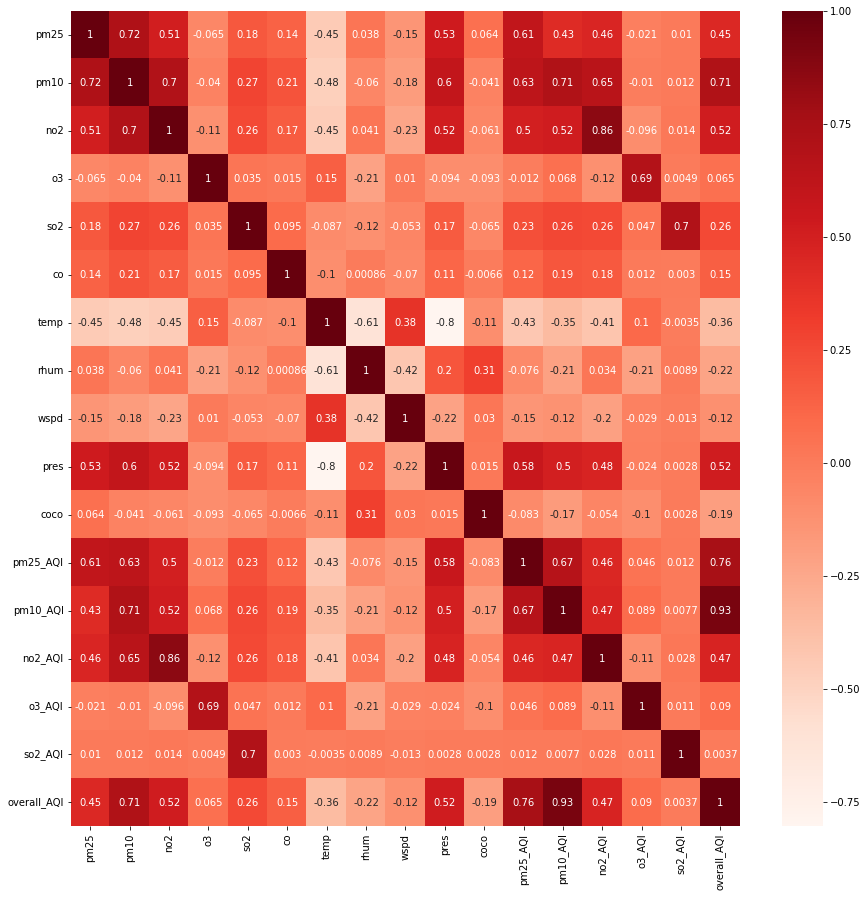

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
cor = final_df.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#data preparation

In [ ]:
final_df.columns

Index(['pm25', 'pm10', 'no2', 'o3', 'so2', 'co', 'temp', 'rhum', 'wspd',
       'pres', 'coco', 'pm25_AQI', 'pm10_AQI', 'no2_AQI', 'o3_AQI', 'so2_AQI',
       'overall_AQI'],
      dtype='object')

In [ ]:
dataset = final_df.copy()
dataset

,pm25,pm10,no2,o3,so2,co,temp,rhum,wspd,pres,coco,pm25_AQI,pm10_AQI,no2_AQI,o3_AQI,so2_AQI,overall_AQI
2020-05-10 05:00:00,58.034210,110.055557,13.585500,52.262104,11.142777,771.052612,34.400002,53.0,14.8,1006.299988,2.0,5.0,5.0,1.0,2.0,1.0,5.0
2020-05-10 06:00:00,58.122581,119.764641,13.946207,46.129311,12.405385,776.624146,36.500000,47.0,11.2,1006.500000,2.0,5.0,5.0,1.0,1.0,1.0,5.0
2020-05-10 07:00:00,58.029293,117.268555,13.009876,50.262165,11.643125,744.784546,36.400002,46.0,13.0,1006.099976,2.0,5.0,5.0,1.0,1.0,1.0,5.0
2020-05-10 08:00:00,57.566273,120.596771,13.470699,56.497150,12.205358,787.172424,37.200001,43.0,11.1,1005.599976,2.0,5.0,5.0,1.0,2.0,1.0,5.0
2020-05-10 09:00:00,52.736923,117.967781,10.979615,43.264999,9.713333,882.083313,27.299999,66.0,13.0,1008.299988,2.0,5.0,5.0,1.0,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01 20:00:00,58.000000,97.247261,21.684875,19.913027,10.997194,1016.422180,29.100000,91.0,0.0,1007.700012,2.0,5.0,4.0,1.0,1.0,1.0,5.0
2021-10-01 21:00:00,58.000000,96.377594,21.543179,19.888464,11.030029,1009.786255,29.100000,94.0,0.0,1008.599976,2.0,5.0,4.0,1.0,1.0,1.0,5.0
2021-10-01 22:00:00,50.000000,95.480873,21.432848,19.918104,11.053946,1005.930054,29.000000,91.0,1.8,1007.599976,2.0,4.0,4.0,1.0,1.0,1.0,4.0
2021-10-01 23:00:00,49.000000,94.638351,21.322311,19.974035,11.027061,1002.761108,28.700001,91.0,1.8,1007.400024,2.0,4.0,4.0,1.0,1.0,1.0,4.0


###dataset

In [ ]:
import pandas as pd
dataset.to_csv("AIR.csv",index=False)


#split data

In [ ]:
from sklearn.model_selection import train_test_split

features=dataset.values
targets=dataset[["pm25", "pm10", "no2", "o3", "so2"]].values

X_train, X_test, y_train, y_test  = train_test_split(features, targets, test_size=0.1, random_state=1, shuffle=False)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.1, random_state=1, shuffle=False)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X_train: (9910, 17)
X_test: (1224, 17)
